# Práctico final de curso "Astroestadística"

    El catálogo que se usará en el presente trabajo es el "All Sky Automated Survey for SuperNovae" (ASAS-SN), primer survey óptico capaz de monitorear el cielo en su totalidad desde la Tierra, alcanzando un límite de magnitud V=18. 
    Si bien el proyecto se enfoca principalmente en detectar supernovas brillantes, también ha descubierto una gran cantidad de estrellas variables de diversos tipos (Cefeidas, RR Lyrae, Rotacionales, entre otras). 
    Para este trabajo se utilizarán las binarias eclipsantes provenientes de dicho catálogo con el objetivo de clasificarlas en detached (EA), semi-detached (EB) y binarias de contacto (EW).
    La muestra a analizar consta de 154530 objetos. Además se empleará una muestra de entrenamiento de 70000 binarias eclipsantes provenientes del mismo catálogo.

# Análisis exploratorio de datos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
tabla = pd.read_csv('binaries_con_clasif.csv')
muestra=pd.DataFrame(tabla)
tabla2 = pd.read_csv('train.csv')
train=pd.DataFrame(tabla2)

Las muestras cuenta con 36 variables, cuyos nombres se detallan a continuación.

In [4]:
muestra.columns

Index(['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag', 'e_w3_mag', 'w4_mag', 'e_w4_mag', 'w1_w2', 'w3_w4'],
      dtype='object')

In [5]:
train.columns

Index(['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag', 'e_w3_mag', 'w4_mag', 'e_w4_mag', 'w1_w2', 'w3_w4'],
      dtype='object')

Se eliminan todos los posibles valores NaN que existan en ambas tablas. Durante este paso se ignoran las columnas de error 'e_w3_mag' y 'e_w4_mag', dado que poseen muchos valores NaN, luego se decidirá cómo proseguir con ellas.

In [6]:
muestra = muestra.dropna(subset=['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag','w4_mag', 'w1_w2', 'w3_w4'])

In [7]:
train = train.dropna(subset=['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag','w4_mag', 'w1_w2', 'w3_w4'])

In [8]:
muestra.shape

(144141, 36)

In [9]:
train. shape

(65260, 36)

Una vez eliminados tales objetos de la muestra, nos quedamos con un conjunto de 144141 datos para clasificar y 65260 objetos en la muestra de entrenamiento. El siguiente paso será representar las istribuciones de las distintas variables de la muestra, con el objetivo de visualizar la posible existencia de valores atípicos.

In [10]:
muestra2=muestra[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

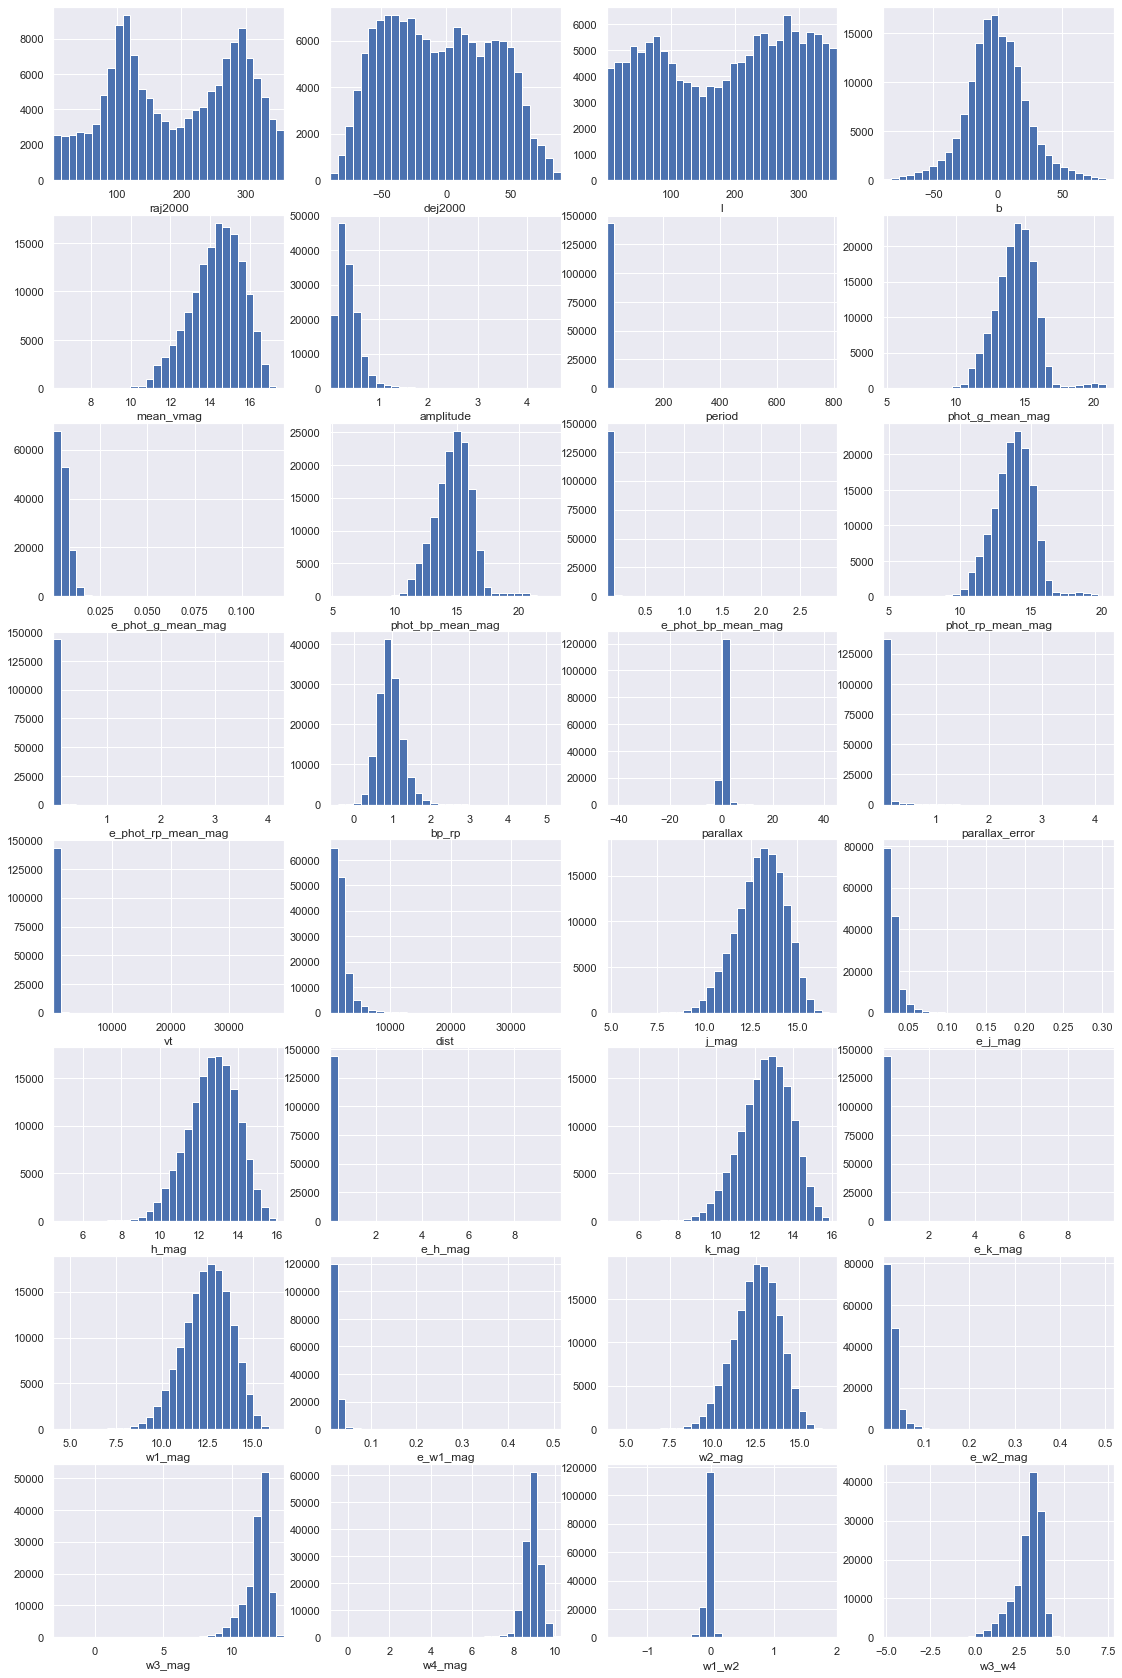

In [11]:
name=muestra2.columns
fig=plt.figure(figsize=(19,30))
fig.tight_layout()
for i in range (muestra2.shape[1]):
    x=muestra2[name[i]]
    ax=plt.subplot(8,4,i+1)
    ax.hist(x,bins=30)
    ax.set(xlabel=name[i])
    ax.set_xlim(min(x),max(x))

Se puede observar que para algunas variables existen ciertos valores que se pueden considerar outliers. Por ello se procederá a eliminar los objetos que posean valores atípicos.

In [12]:
muestra3=muestra[['amplitude','period','e_phot_g_mean_mag','e_phot_bp_mean_mag',
       'e_phot_rp_mean_mag', 'parallax',
       'parallax_error', 'vt', 'dist','e_j_mag','e_h_mag',
       'e_k_mag', 'e_w1_mag', 'e_w2_mag',
       'w3_mag', 'w4_mag','w1_w2']]

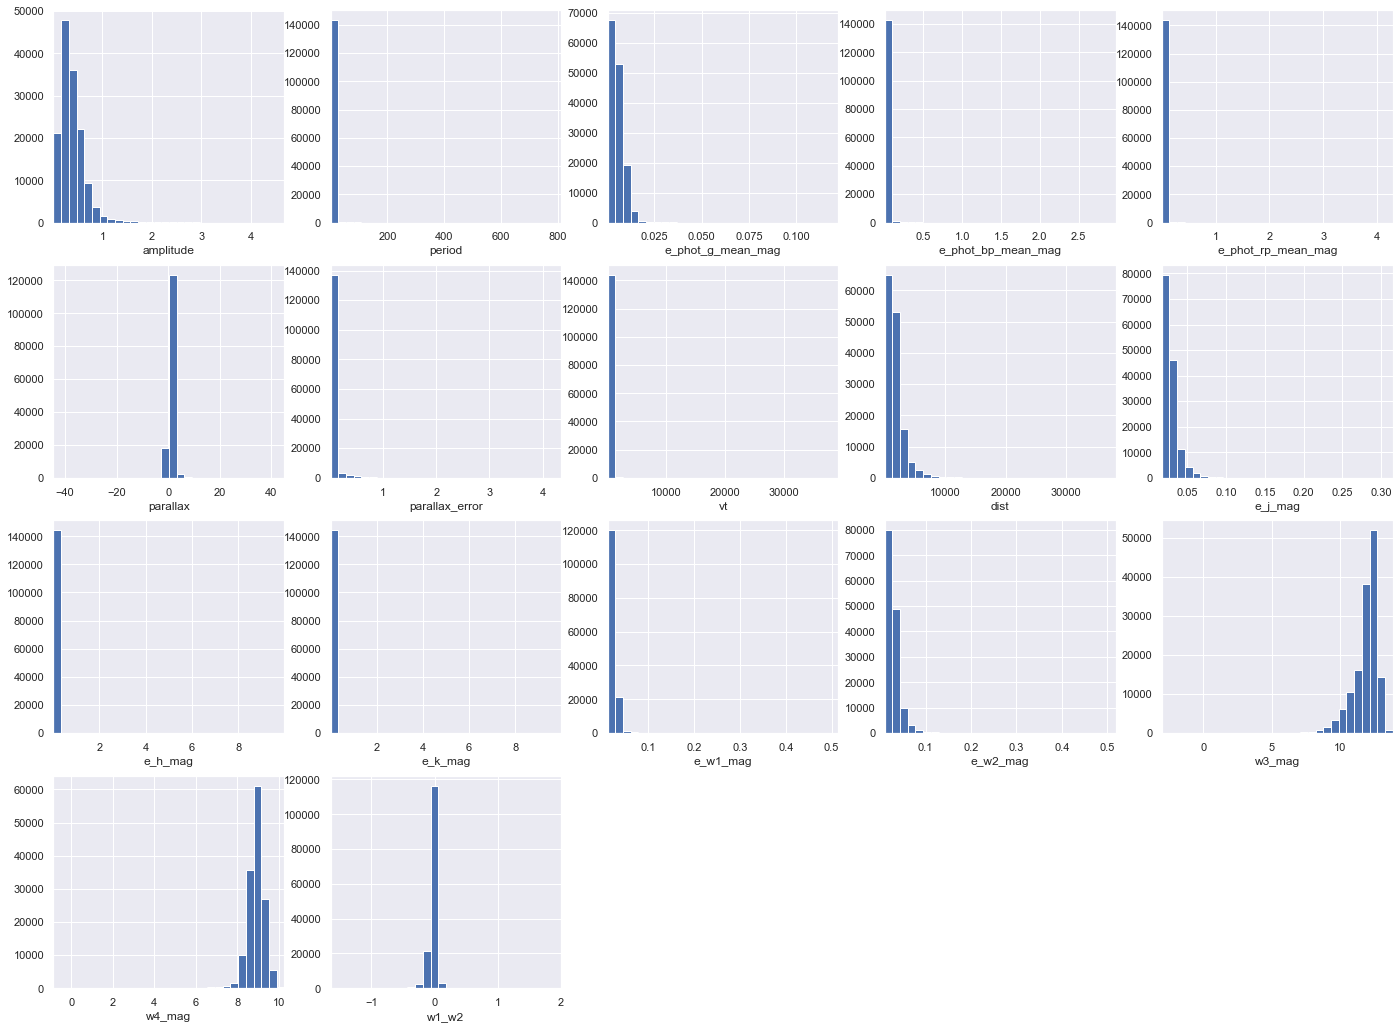

In [15]:
outliers=muestra3.columns
fig=plt.figure(figsize=(24,18))
fig.tight_layout()
for i in range (muestra3.shape[1]):
    x=muestra3[outliers[i]]
    ax=plt.subplot(4,5,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Elimino los valores atípicos de la muestra de la siguiente manera:

In [16]:
for i in range (muestra3.shape[1]):
    q1= np.quantile(muestra2[outliers[i]], 0.10)
    q3= np.quantile(muestra2[outliers[i]], 0.90)
    minn=q1-1.5*(q3-q1)
    maxx=q3+1.5*(q3-q1)
    muestra2=muestra2[(muestra2[outliers[i]] > minn)&(muestra2[outliers[i]] < maxx)]

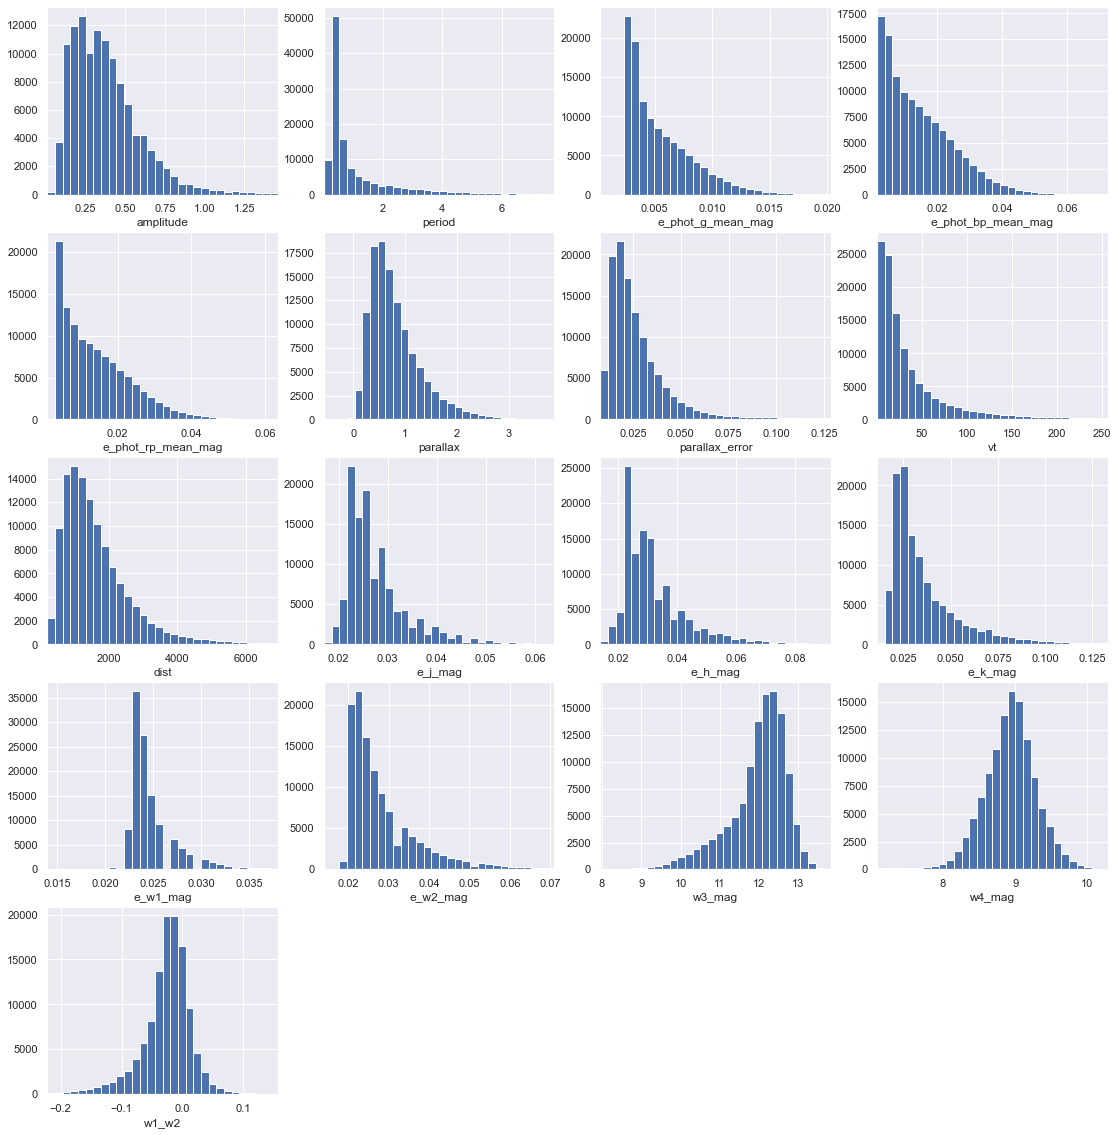

In [17]:
outliers=muestra3.columns
fig=plt.figure(figsize=(19,20))
fig.tight_layout()
for i in range (muestra3.shape[1]):
    x=muestra2[outliers[i]]
    ax=plt.subplot(5,4,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Aún se observan valores atípicos en la variable 'period', por lo que haré un nuevo corte según esta variable.

Text(0.5, 0, 'Period')

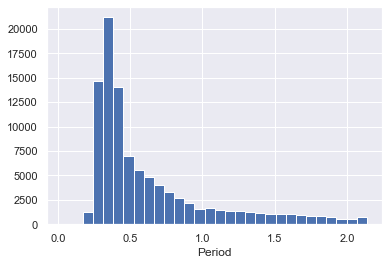

In [20]:
q1= np.quantile(muestra2['period'], 0.20)
q3= np.quantile(muestra2['period'], 0.80)
minn=q1-1.5*(q3-q1)
maxx=q3+1.5*(q3-q1)
muestra2=muestra2[(muestra2['period'] > minn)&(muestra2['period'] < maxx)]
plt.hist(muestra2['period'],bins=30)
plt.xlabel('Period')

Ahora llevo a cabo el mismo procedimiento para la muestra de entrenamiento.

In [21]:
train2=train[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

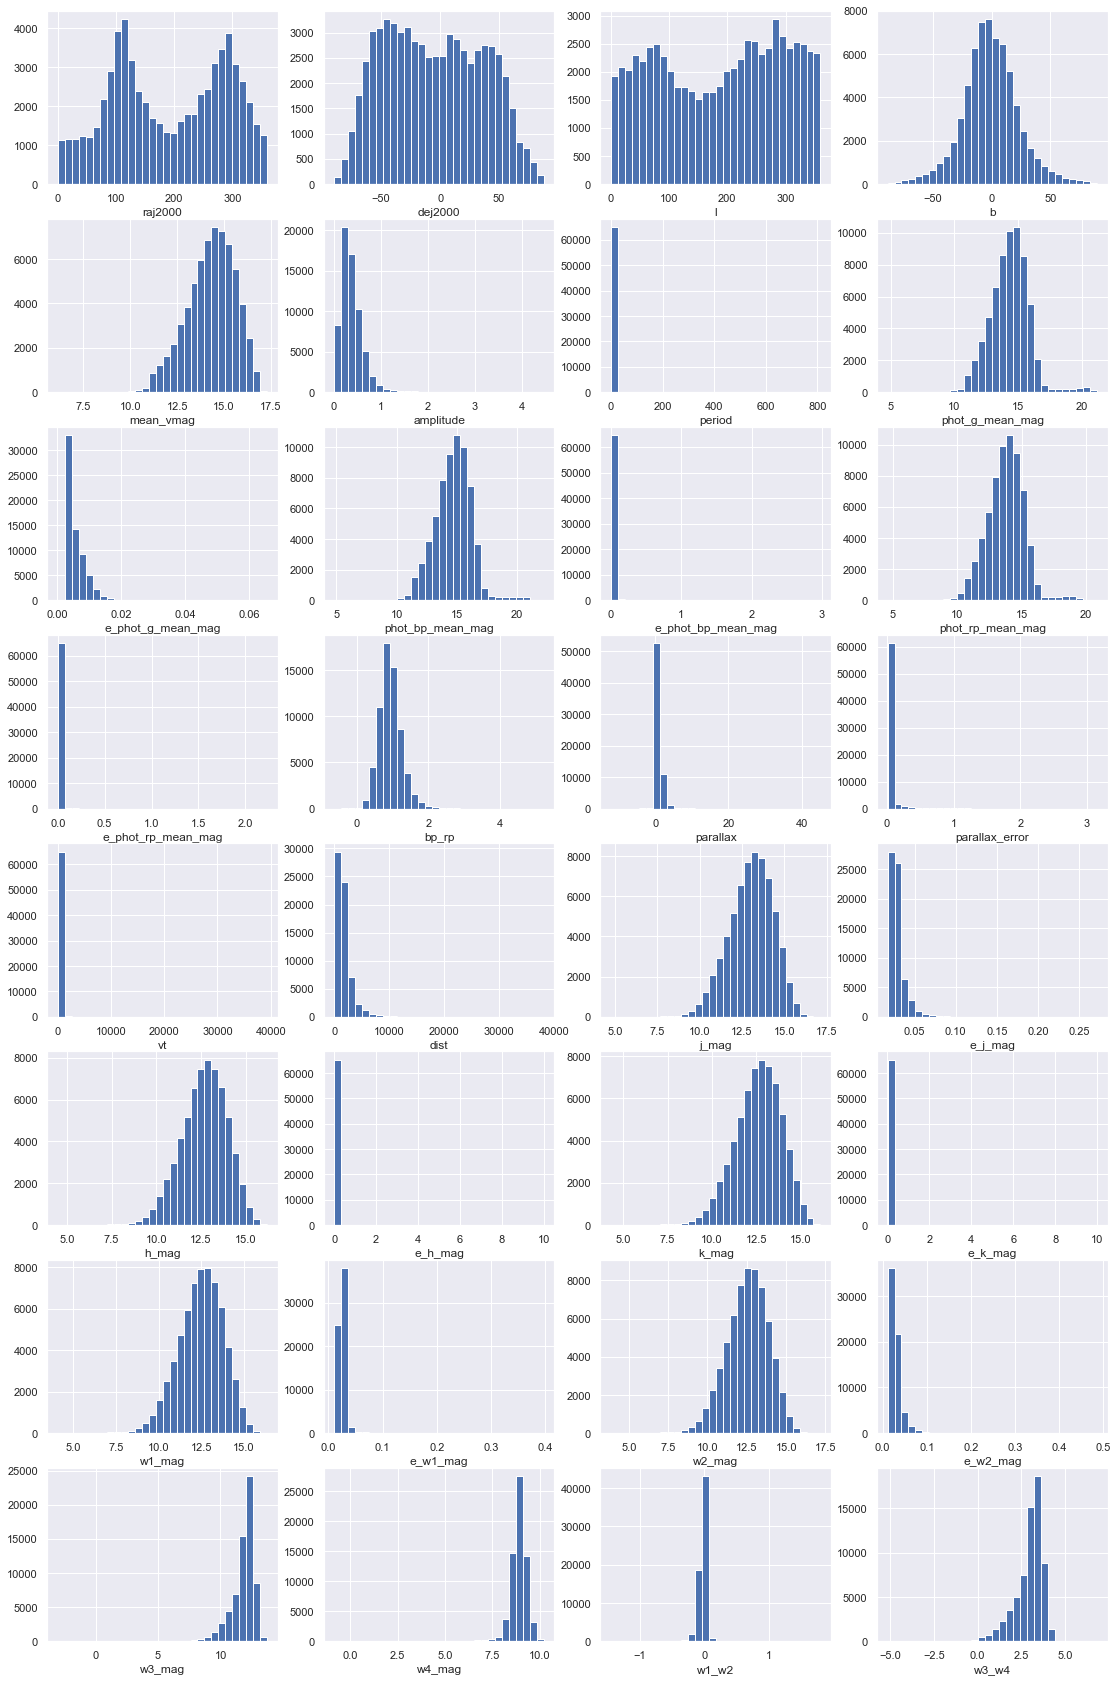

In [22]:
name=train2.columns
fig=plt.figure(figsize=(19,30))
fig.tight_layout()
for i in range (train2.shape[1]):
    x=train2[name[i]]
    ax=plt.subplot(8,4,i+1)
    ax.hist(x,bins=30)
    ax.set(xlabel=name[i])

In [23]:
train3=train[['amplitude','period','e_phot_g_mean_mag','e_phot_bp_mean_mag',
       'e_phot_rp_mean_mag', 'parallax',
       'parallax_error', 'vt', 'dist','e_j_mag','e_h_mag',
       'e_k_mag', 'e_w1_mag', 'e_w2_mag',
       'w3_mag', 'w4_mag','w1_w2']]

In [24]:
for i in range (train3.shape[1]):
    q1= np.quantile(train2[outliers[i]], 0.10)
    q3= np.quantile(train2[outliers[i]], 0.90)
    minn=q1-1.5*(q3-q1)
    maxx=q3+1.5*(q3-q1)
    train2=train2[(train2[outliers[i]] > minn)&(train2[outliers[i]] < maxx)]

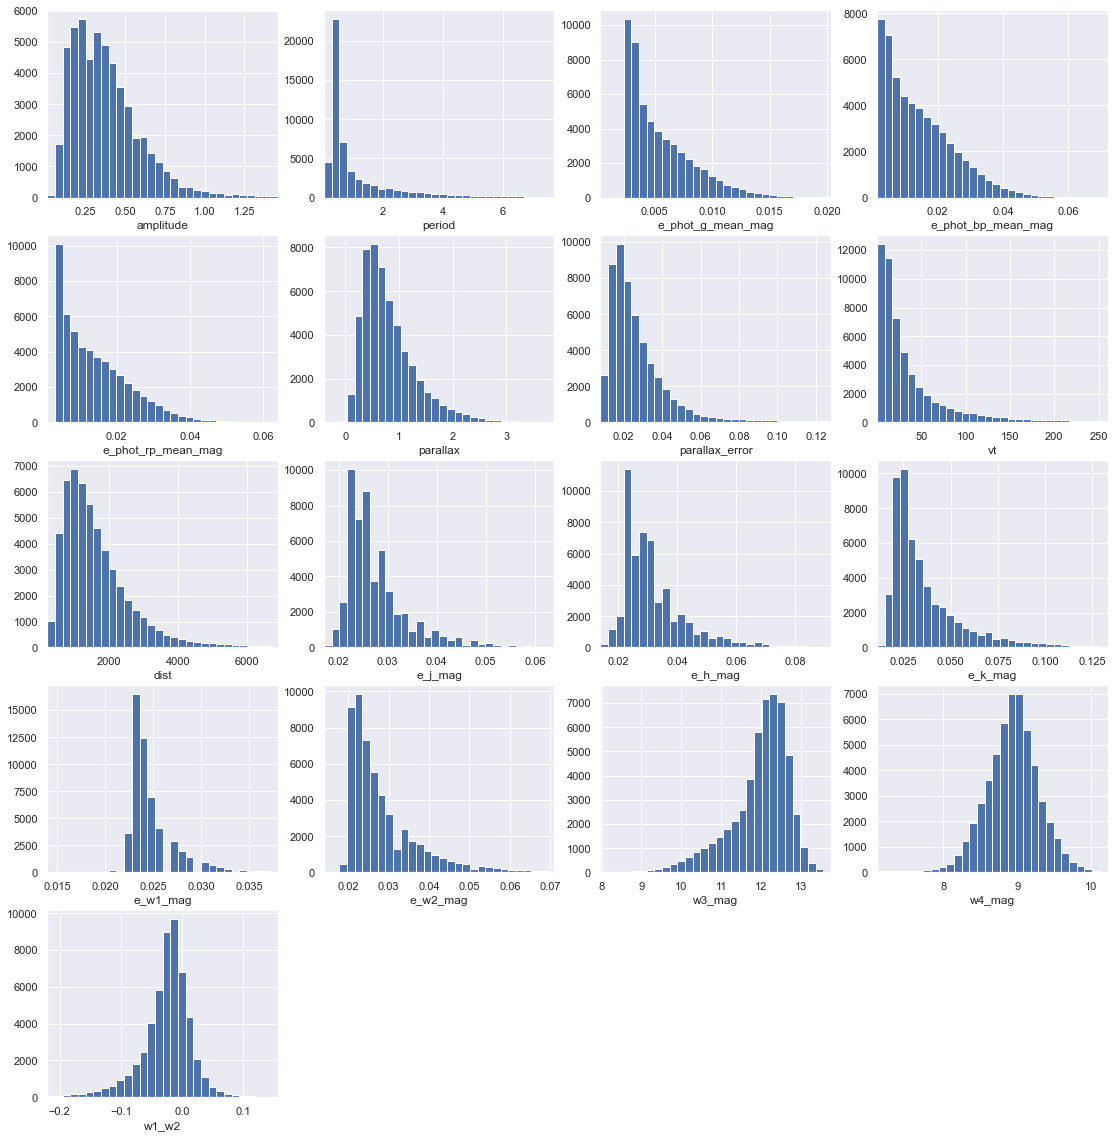

In [25]:
outliers=train3.columns
fig=plt.figure(figsize=(19,20))
fig.tight_layout()
for i in range (train3.shape[1]):
    x=train2[outliers[i]]
    ax=plt.subplot(5,4,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Text(0.5, 0, 'Period')

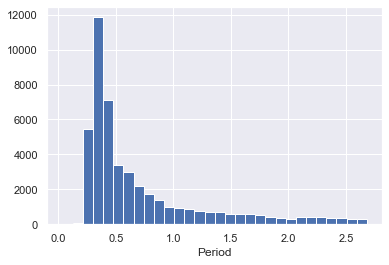

In [27]:
q1= np.quantile(train2['period'], 0.20)
q3= np.quantile(train2['period'], 0.80)
minn=q1-1.5*(q3-q1)
maxx=q3+1.5*(q3-q1)
train2=train2[(train2['period'] > minn)&(train2['period'] < maxx)]
plt.hist(train2['period'],bins=30)
plt.xlabel('Period')

# Análisis PCA

Para realizar el análisis PCA, se comienza por la visualización de media y varianza de las variables de la muestra.

In [28]:
media=muestra2.mean(axis=0)
varianza=muestra2.var(axis=0)

df = pd.DataFrame()
df['Media']=media
df['Varianza']=varianza

df

,Media,Varianza
raj2000,190.985272,9721.229087
dej2000,-4.146337,1655.873533
l,185.373774,11126.513601
b,-0.919624,602.023101
mean_vmag,14.439316,1.441376
amplitude,0.373961,0.041620
period,0.636614,0.189887
phot_g_mean_mag,14.393749,1.487814
e_phot_g_mean_mag,0.005911,0.000008
phot_bp_mean_mag,14.759539,1.602478


    Es necesario estandarizar las variables dado que algunas tienen valores muy elevados (dist, vt) respecto al resto y podrían dominar las componentes principales al hacer el análisis PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [30]:
pipeline = make_pipeline(StandardScaler(), PCA())
pipeline.fit(muestra2)
pca = pipeline.named_steps['pca']  #extraigo modelo PCA

Realizo un mapa de calor para visualizar la importancia de cada variable en las componentes principales del modelo PCA

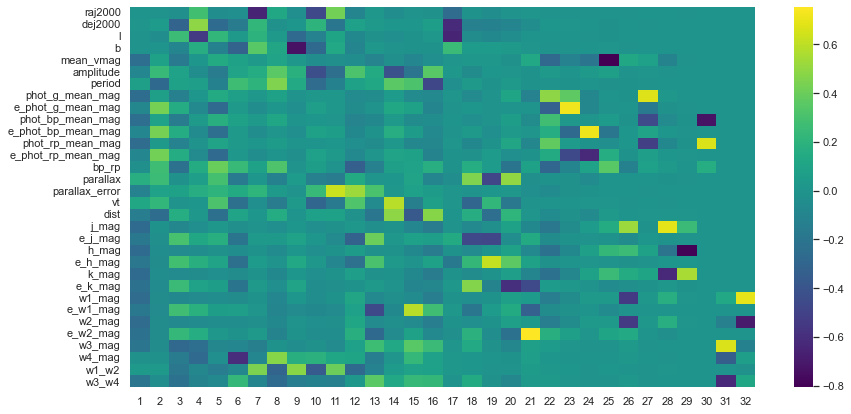

In [31]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
heat_map = sns.heatmap(pca.components_.T, xticklabels=np.arange(pca.n_components_) + 1, 
                       yticklabels=muestra2.columns,cmap='viridis')

Continúo con la realización de un gráfico que muestre la varianza explicada acumulada para tener una idea de la cantidad de variables que aportan información relevante.

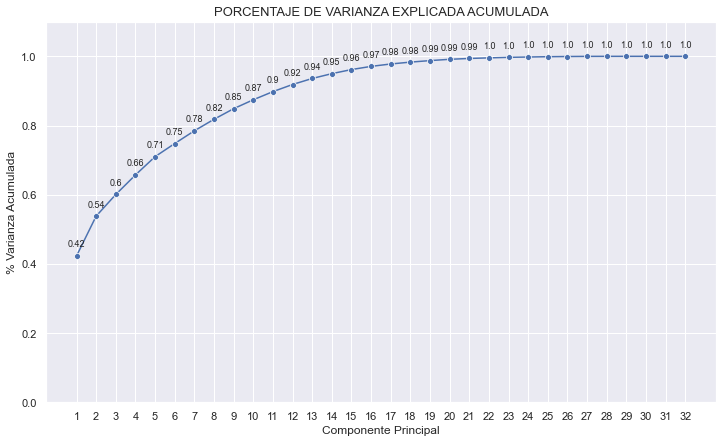

In [34]:
varianza_acum = pca.explained_variance_ratio_.cumsum()

fig = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax = sns.lineplot(x=np.arange(len(muestra2.columns)) + 1, y=varianza_acum, marker='o', data=pca, legend='brief')

for x, y in zip(np.arange(len(muestra2.columns))+1, varianza_acum):
    label = round(y, 2)
    ax.annotate(round(y, 2), (x,y), textcoords="offset points", xytext=(0,9), ha='center', fontsize=9)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_)+1)
ax.set_title('PORCENTAJE DE VARIANZA EXPLICADA ACUMULADA', fontsize=13)
ax.set_xlabel('Componente Principal')
ax.set_ylabel('% Varianza Acumulada');